# Explore here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

from sklearn.metrics import mean_squared_error

import joblib


In [8]:
# df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")

# df.to_csv("../data/raw/raw_data.csv")

df = pd.read_csv("../data/raw/raw_data.csv")

df.drop("Unnamed: 0", axis=1, inplace=True)

df

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


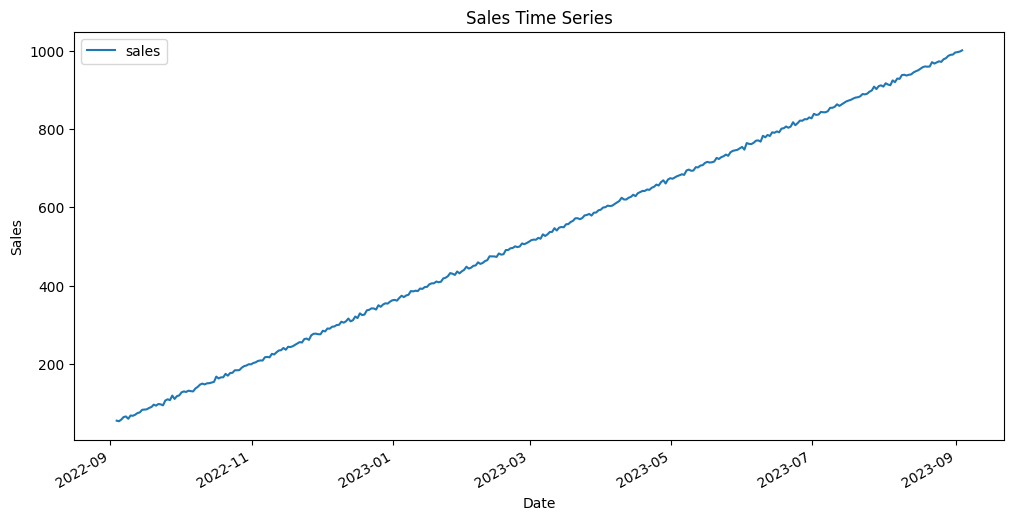

In [9]:
# Convert the 'date' column to datetime if it's not already
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Plot the time series
df.plot(figsize=(12, 6))
plt.title('Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

None
ADF Statistic: 0.5454141937063706
p-value: 0.9861899815311063


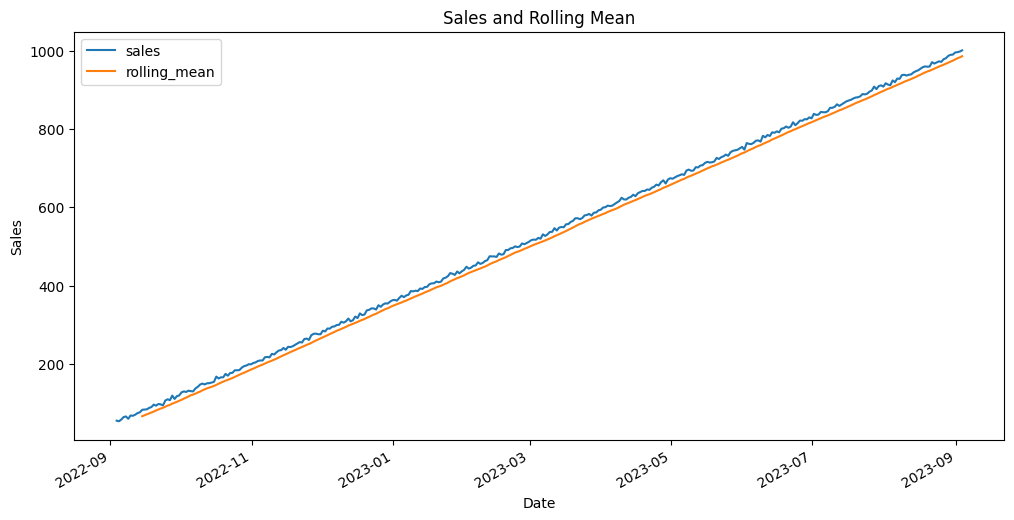

In [11]:
# Checking the frequency of the dataset
print(df.index.freq)

result = adfuller(df['sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Checking the trend using rolling mean
df['rolling_mean'] = df['sales'].rolling(window=12).mean()
df[['sales', 'rolling_mean']].plot(figsize=(12, 6))
plt.title('Sales and Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [17]:
# Split the data into training and test sets
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:]

# Find the best parameterization of ARIMA
model = auto_arima(train['sales'], seasonal=False, trace=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1675.428, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1578.564, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1475.165, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1763.761, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1475.512, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1475.495, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1479.028, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1762.924, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.144 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  292
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -734.582
Date:                Mon, 05 Aug 2024   AIC                           1475.165
Time:                        20:28:57   BIC                           1486.185
Sample:                    09-03-2022   HQIC                          1479.579
                         - 06-21-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.5984      0.011    243.641      0.000       2.577       2.619
ma.L1         -0.9439      0.021    -44.117      0.000      -0.986      -0.902
sigma2         9.0537      0.817     11.084      0.000       7.453      10.655
===================================================================================
Ljung-Box (L1) (Q):                   1.34   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.25   Prob(JB):                         0.54
Heteroskedasticity (H):               0.95   Skew:                             0.06
Prob(H) (two-sided):                  0.81   Kurtosis:                         2.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
# Train the ARIMA model
arima_model = ARIMA(train['sales'], order=model.order)
arima_model_fit = arima_model.fit()
arima_model_fit.summary()


d:\Programs\Anaconda\envs\tf_gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Programs\Anaconda\envs\tf_gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Programs\Anaconda\envs\tf_gpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                  292
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -879.462
Date:                Mon, 05 Aug 2024   AIC                           1762.924
Time:                        20:29:02   BIC                           1770.271
Sample:                    09-03-2022   HQIC                          1765.867
                         - 06-21-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0758      0.077     -0.981      0.326      -0.227       0.076
sigma2        24.6927      2.048     12.056      0.000      20.679      28.707
===================================================================================
Ljung-Box (L1) (Q):                  73.69   Jarque-Bera (JB):                 2.88
Prob(Q):                              0.00   Prob(JB):                         0.24
Heteroskedasticity (H):               1.05   Skew:                             0.24
Prob(H) (two-sided):                  0.83   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

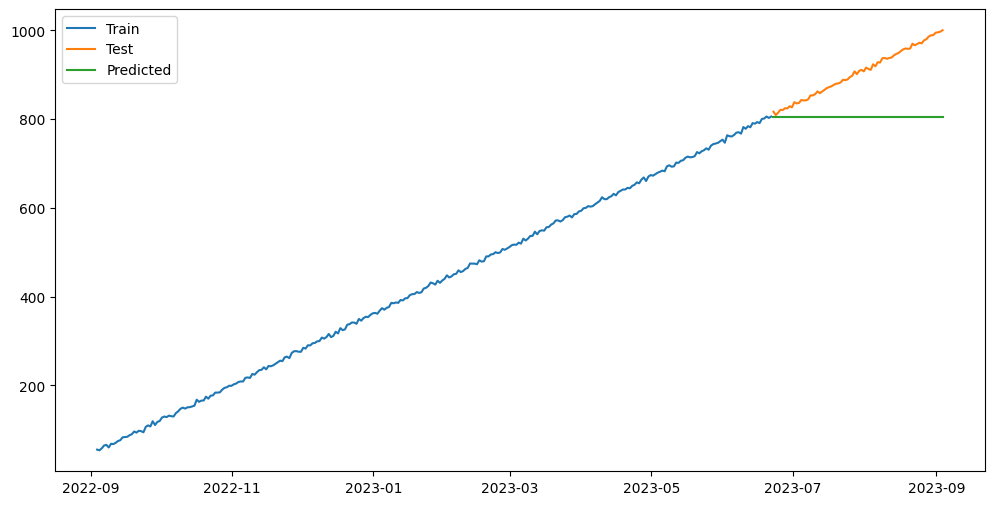

Mean Squared Error: 12854.466717120205


In [14]:
# Make predictions
predictions = arima_model_fit.forecast(steps=len(test))
predictions = pd.Series(predictions, index=test.index)

# Plot predictions vs actual sales
plt.figure(figsize=(12, 6))
plt.plot(train['sales'], label='Train')
plt.plot(test['sales'], label='Test')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

# Measure performance
mse = mean_squared_error(test['sales'], predictions)
print('Mean Squared Error:', mse)


In [15]:
# Save the model
joblib.dump(arima_model_fit, '../models/arima_model.pkl')

# To load the model later, you can use:
# loaded_model = joblib.load('arima_model.pkl')


['../models/arima_model.pkl']